## 19 - Skew-T Parcel Path

Watch video: [YouTube](https://www.youtube.com/watch?v=7QsBJTwuLvE)

In [1]:
import warnings
import datetime
import numpy as np
import matplotlib.pyplot as plt
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units, pandas_dataframe_to_unit_arrays
import metpy.calc as mpcalc
import metpy.plots as plots
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
date = datetime.datetime(2017, 9, 10)
df = WyomingUpperAir.request_data(date, 'BMX')
df = pandas_dataframe_to_unit_arrays(df)

In [3]:
p = df['pressure']
T = df['temperature']
Td = df['dewpoint']
u = df['u_wind']
v = df['v_wind']

In [4]:
interval = np.logspace(2, 3) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)

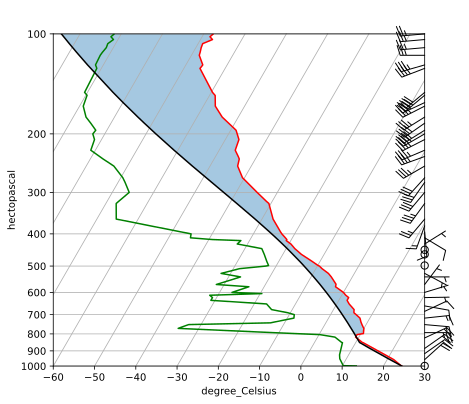

In [11]:
warnings.filterwarnings('ignore', category=UserWarning)
fig = plt.figure(1, figsize=(8, 6))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_xlim(-60, 30)
skew.ax.set_ylim(1000, 100)
skew.plot_barbs(p[idx], u[idx], v[idx])
parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])
skew.plot(p, parcel_path, 'black')
skew.shade_cape(p, T, parcel_path)
skew.shade_cin(p, T, parcel_path)
plt.show()